# Titanic 

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

https://www.kaggle.com/c/titanic/overview

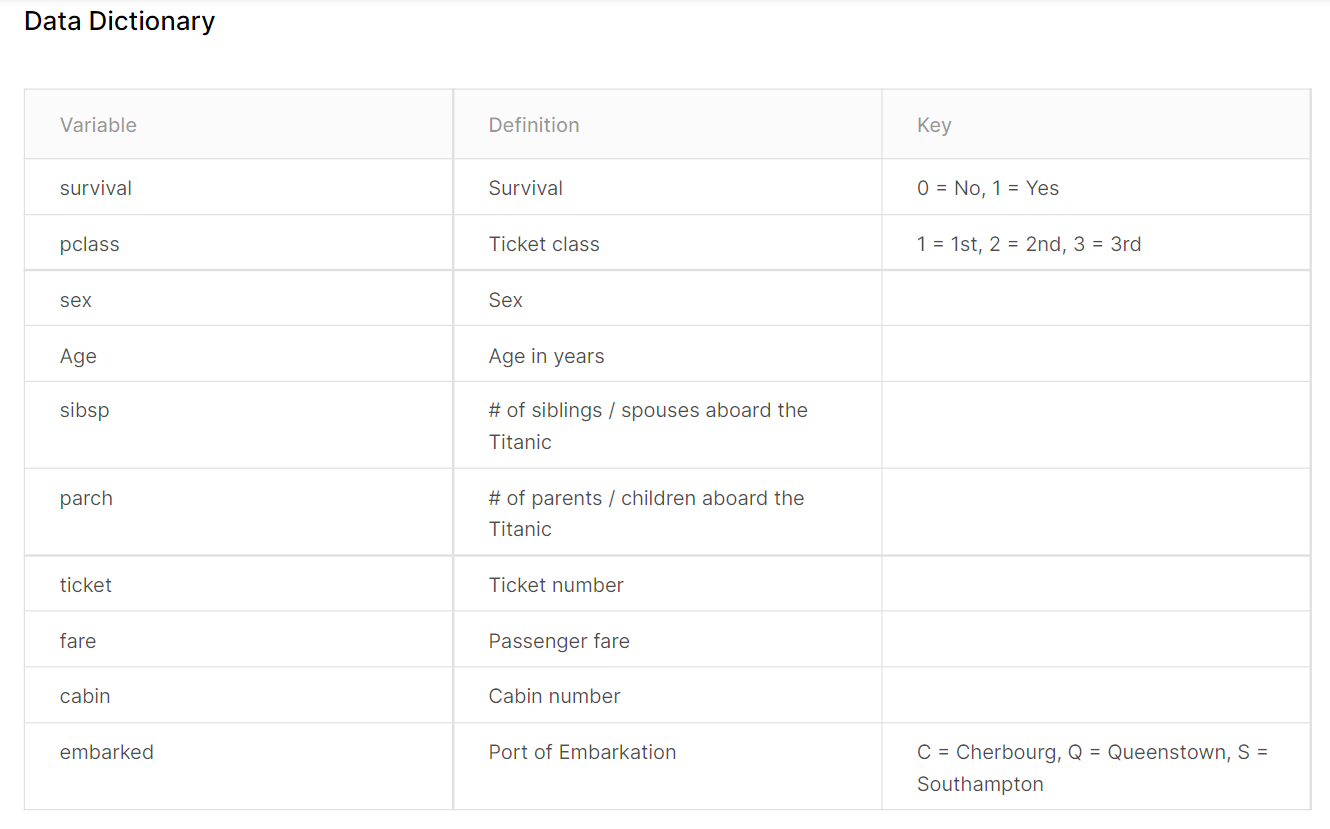

## Import libraries

In [667]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("dark", 69)
sns.set(rc = {'figure.figsize':(15,8)})

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Let's have a look at the data

In [668]:
df = pd.read_csv("titanic_train.csv")

In [669]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


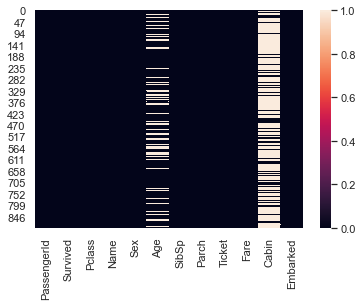

In [671]:
# as we can seee, we miss some information in "cabin" and "age" categories; 
# let's elaborate on that by looking at the heatmap

sns.heatmap(df.isnull())

In [672]:
# white lines are the missing data. 
# 1. We don't miss too much "age" data, so it can be replaced by the mean or median age
# 2. We don't have enough "cabin" data, so we will not even consider it at all

# we will deal with this in the Data Cleaning section; now, it's time to analyze the data

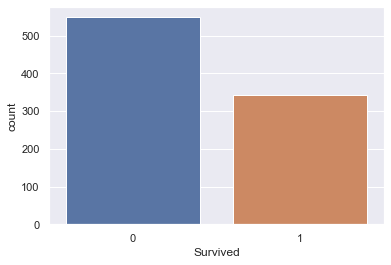

In [673]:
sns.countplot(x = 'Survived', data = df)

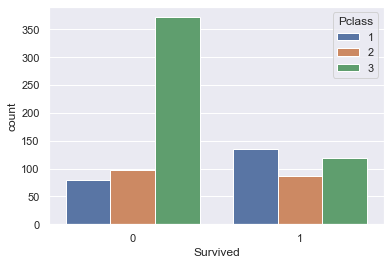

In [674]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)


# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

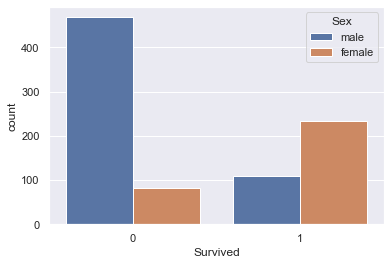

In [675]:
sns.countplot(x = "Survived", hue = "Sex", data = df)

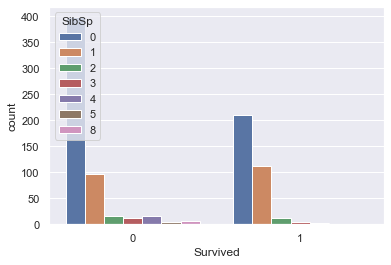

In [676]:
sns.countplot(x = "Survived", hue = "SibSp", data = df)

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

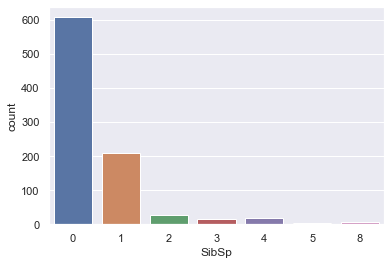

In [677]:
sns.countplot(x = 'SibSp', data = df)

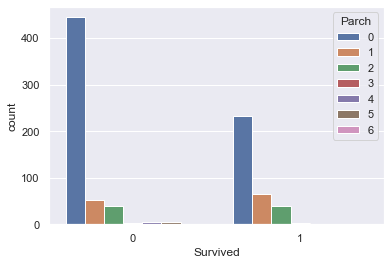

In [678]:
sns.countplot(x = "Survived", hue = "Parch", data = df)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

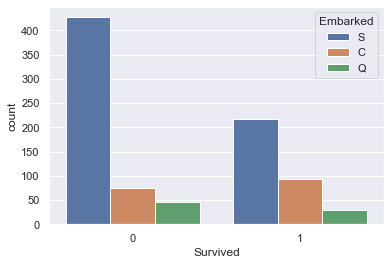

In [679]:
sns.countplot(x = "Survived", hue = "Embarked", data = df)

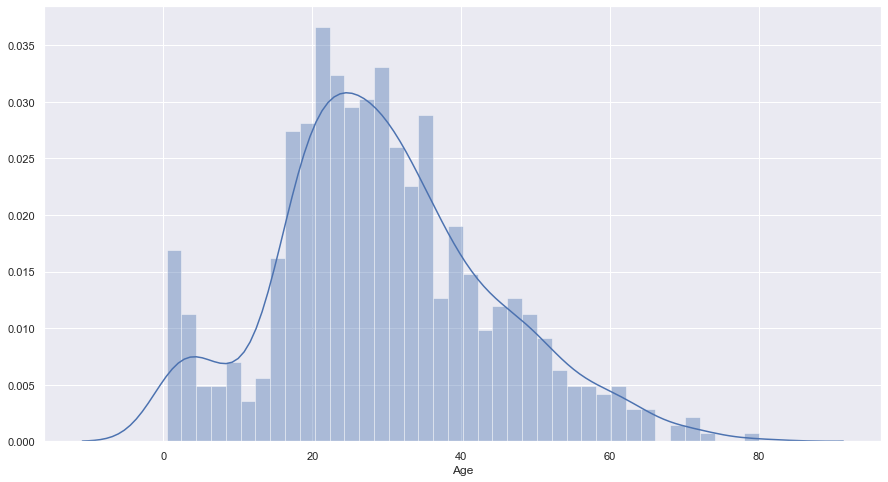

In [680]:
sns.set(rc = {"figure.figsize":(15,8)})
sns.distplot(df["Age"].dropna(), bins = 40)

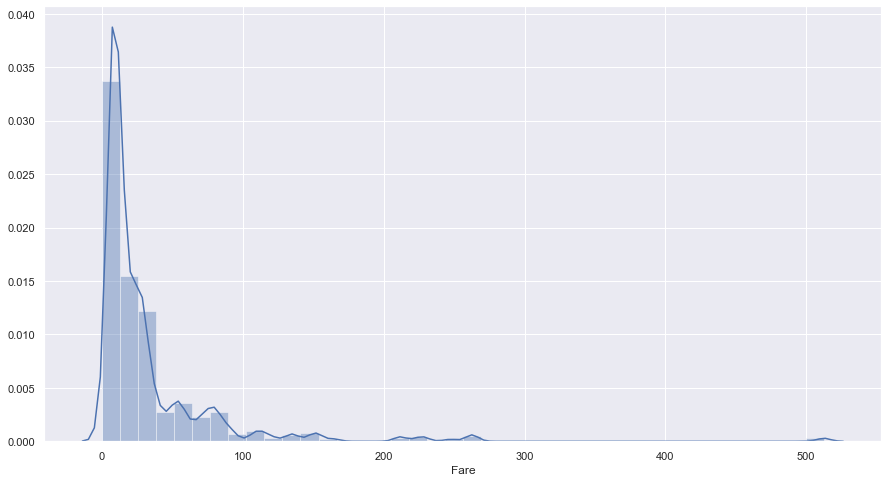

In [681]:
sns.distplot(df["Fare"], bins = 40)

## 2. Data Cleaning and feature engineering 

In [682]:
df.drop("Cabin", axis = 1, inplace = True)

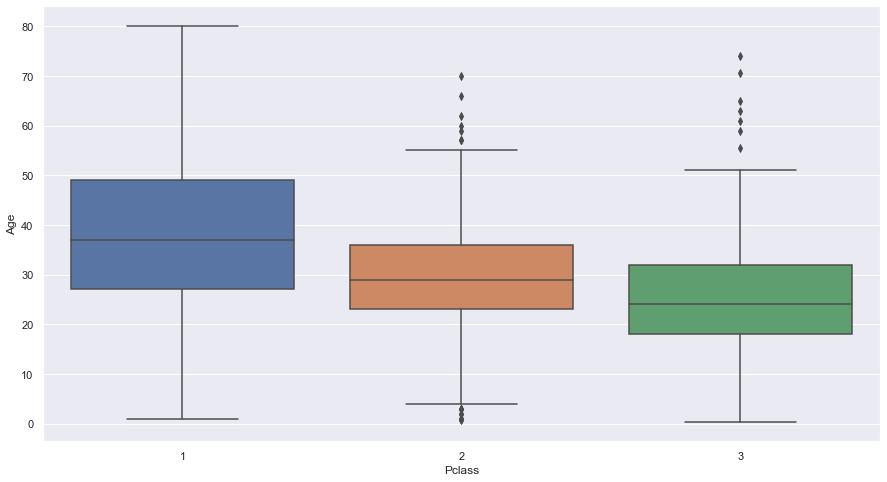

In [683]:
sns.boxplot(x = "Pclass", y = "Age", data = df)

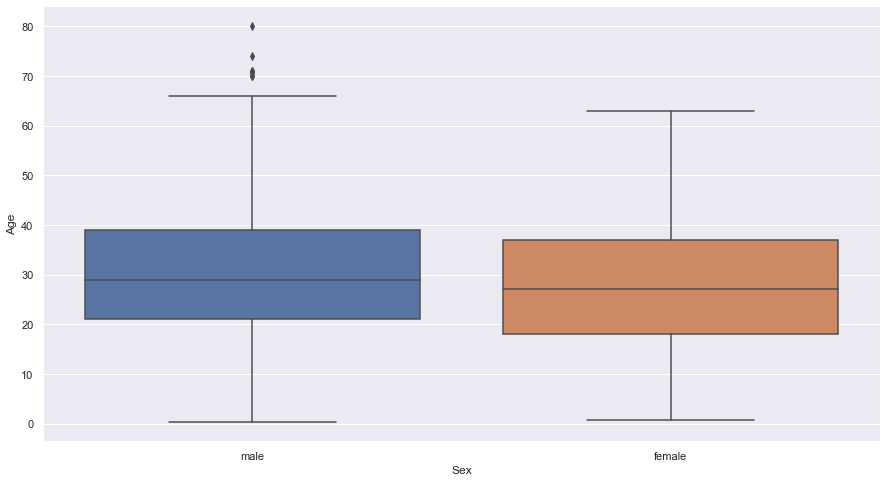

In [684]:
sns.boxplot(x = "Sex", y = "Age", data = df)

In [685]:
# We will replace the missing age data with the corresponding "Pclass" mean
# 1. Divide the data based on classes
# 2. Replace null values with the corresponding mean value
# 3. Merge the classes

class1 = df[df["Pclass"] == 1]
class2 = df[df["Pclass"] == 2]
class3 = df[df["Pclass"] == 3]

class1["Age"].fillna(value = df[df["Pclass"] == 1]["Age"].mean(), inplace = True)
class2["Age"].fillna(value = df[df["Pclass"] == 2]["Age"].mean(), inplace = True)
class3["Age"].fillna(value = df[df["Pclass"] == 3]["Age"].mean(), inplace = True)

df = pd.concat([class1, class2, class3])

In [686]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [687]:
df.reset_index(inplace = True)

In [688]:
# Before creating the model, we need to format the data:
# 1. One-hot encoding: Convert categorical data to numerical (Sex, Embarked)
# 2. Get rid of useless information (Ticket, Id, Name)
# 3. Scale the numerical data

In [689]:
sex = pd.get_dummies(df["Sex"]) 
embark = pd.get_dummies(df["Embarked"])

In [690]:
df.drop(["PassengerId", "Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

df = pd.concat([df, sex, embark], axis=1)

In [691]:
df.head()

,index,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,1,1,38.0,1,0,71.2833,1,0,1,0,0
1,3,1,1,35.0,1,0,53.1000,1,0,0,0,1
2,6,0,1,54.0,0,0,51.8625,0,1,0,0,1
3,11,1,1,58.0,0,0,26.5500,1,0,0,0,1
4,23,1,1,28.0,0,0,35.5000,0,1,0,0,1


In [692]:
df.drop("index", axis=1, inplace=True)

In [693]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

df[to_scale] = scaler.fit_transform(df[to_scale])

## Building & Comaring models

In [694]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size=0.25)

In [695]:
# We will compare the following models
# Logistic regression
# Random forest
# Adaptive boosting

In [696]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import classification_report

In [697]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
pred1 = logistic.predict(x_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       140
           1       0.77      0.78      0.78        83

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



In [698]:
randfor = RandomForestClassifier()
randfor.fit(x_train, y_train)
pred1 = randfor.predict(x_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       140
           1       0.76      0.75      0.75        83

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



In [699]:
adaboo = AdaBoostClassifier()
adaboo.fit(x_train, y_train)
pred1 = adaboo.predict(x_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       140
           1       0.75      0.80      0.77        83

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

